# Using the CRM class in clintrials

The CRM class is found here:

In [1]:
from clintrials.dosefinding.crm import CRM

We also import the logistic function and its inverse to use as the link functions in our examples.

In [2]:
from clintrials.common import logistic, inverse_logistic

### Example 1

On p.21 of his book, Ken Cheung gives an example of a CRM trial involving 5 doses. The prior expectations
of the probability of toxicity at each dose, elicited from a clinical investigator, are 5%, 12%, 25%, 40% and
55% respectively. The investigator wants to identify the dose with probability of toxicity closest to 25%.
The minimum model inputs are:

* an estimate of the prior probability of toxicity at each dose
* a desired level of toxicity to target

We enter:

In [3]:
prior = [0.05, 0.12, 0.25, 0.40, 0.55]
target_toxicity = 0.25

We tend to refer to the doses by their position in this list. For example, the investigator expects dose-level 2, to yield
a dose-limiting toxicity (DLT) in 12% of patients.

Create an instance of a CRM trial:

In [7]:
crm = CRM(prior, target_toxicity, first_dose=3, max_size=20, F_func=logistic, inverse_F=inverse_logistic)

I am using the logistic method here. It could be empiric, etc. See Ken Cheung's book, _Dose Finding with Continual Reassessment Method_.

In addition to the prior and target toxicity, we have provided some extra variables. We have told the trial that the starting dose will be dose-level 3, thethat  maximum trial size will be 20 patients, and that we wish to use the logistic function (and its inverse) to link codified dose levels to probabilities. 

As the trial progresses, we provide information on dose-levels administered and DLTs observed. The crm
function takes these inputs and provides outputs, including the dose recommended for the next patient by
the CRM algorithm.
Let’s say that we have registered and evaluated five patients in the trial:

* The first patient was given dose level 3 and did not have a DLT.
* The second patient was given dose level 5 and also did not have a DLT.
* The third patient was also given dose level 5 but did unfortunately have a DLT.
* The next two patients were given doses 3 and 4 and neither experienced DLT.

We create lists of dose levels given and binary toxicity events:

In [8]:
doses_given = [3, 5, 5, 3, 4]
toxicities = [0, 0, 1, 0, 0]
cases = zip(doses_given, toxicities)

The get the CRM design to advise us of the next dose, we update our CRM trial instance with the observed cases:

In [9]:
next_dose = crm.update(cases)
print(next_dose)

4


Based on the provided priors, the doses given and the resulting tolerance and toxicity events, the dose-level estimated to have probability closest to 25% is dose-level 4. This is the dose that the model advises giving to the 6th patient.

After our five observations, the posterior estimate for the value of $\hat{\beta}$ is:

In [10]:
crm.beta_hat

0.27946135371441966

In [11]:
%matplotlib inline

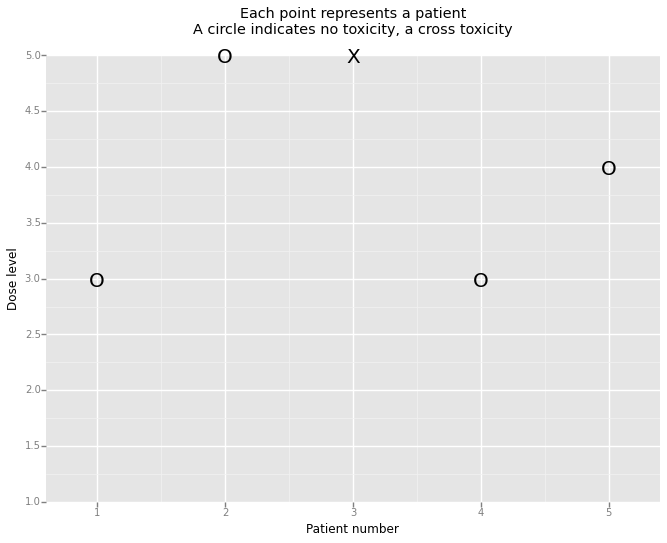

<ggplot: (32396534)>

In [12]:
crm.plot_outcomes()

This chart shows the doses given to patients, where toxicities are represented with crosses and tolerances circles.

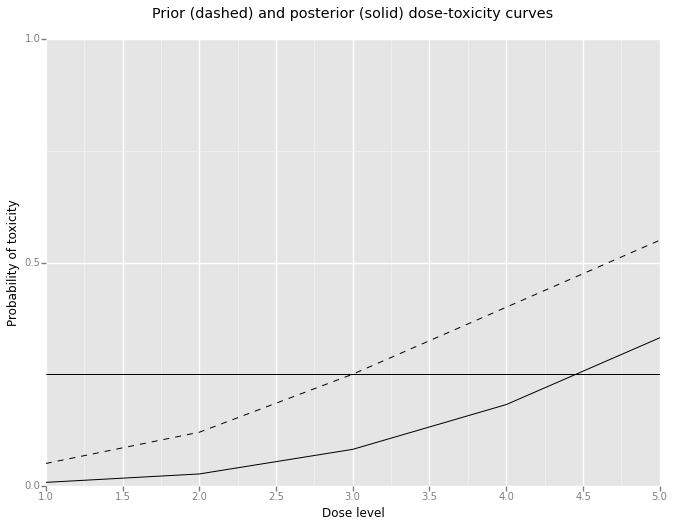

<ggplot: (32395247)>

In [13]:
crm.plot_toxicity_probabilities()

This chart shows the prior and posterior dose-toxicity curves. The prior curve is shown with a dashed line and the updated
posterior curve, i.e. the curve reflecting both prior beliefs and observed data, is shown with a solid line.

### Example 2

TODO

#### References

O’Quigley J., Pepe M., and Fisher L. _Continual reassessment method: a practical design for phase 1 clinical
trials in cancer_. Biometrics. 1990 Mar; 46(1): p. 33-48.

Cheung, Y.K., _Dose Finding by the Continual Reassessment Method_, CRC Press, ISBN 9781420091519